In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import linalg as la
rng = np.random.RandomState(1234)

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues returned by the two different algorithms: 
[2.64557028e+01 4.65637718e-16 1.90192884e+00]
[2.64557028e+01 1.90192884e+00 6.36804215e-16]
Did the two algorithms return the same eigenvalues (within a 1e-5 tolerance)?
[ True  True  True]
Contributions to variance along the three eigenvectors' direction:
[0.933 0.    0.067]


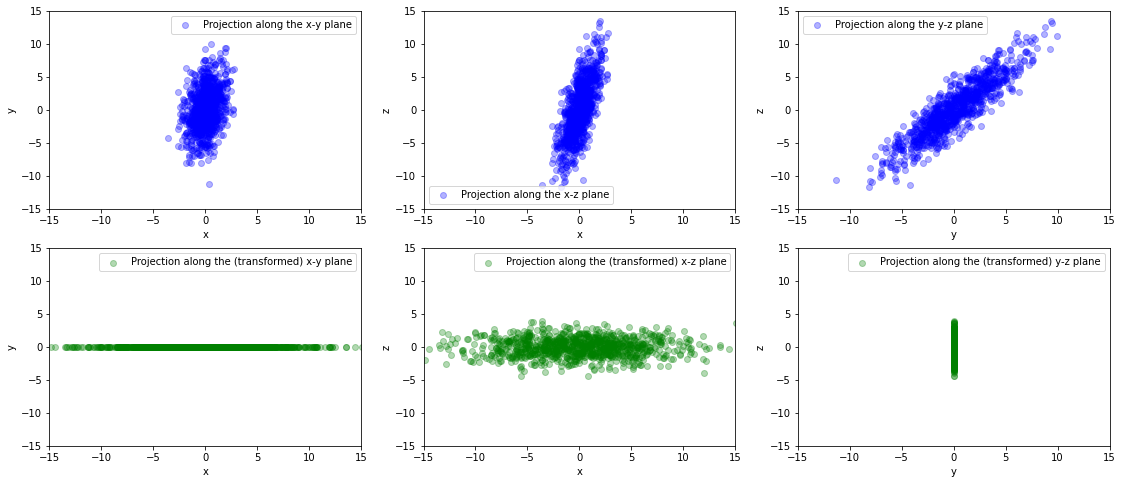

In [2]:
# 1: BUILDING DATA

N = 1000
data = np.empty((3,N))
data[0] = rng.normal(loc=0,scale=1,size=N)
data[1] = data[0] + rng.normal(loc=0,scale=3,size=N)
data[2] = 2*data[0] + data[1]

# the way we built the third component of the dataset basically samples points from a plane in 3d, so if we calculate the covariance matrix
# we should expect to see an eigenvalue basically equal to zero. That component carries no information so we can concentrate on the
# distribution of data in the "plane", reducing the dimension 3->2

# 2: DIAGONALIZATION

# -------- eigen decomposition
c=np.cov(data)
l,V=la.eig(c) #V[:,i] is the normalized eigenvector corresponding to the l[i] eigenvalue 
l_real = np.real_if_close(l)
# -------- singular value decomposition
U,D,Vt = la.svd(c) # columns of Vt.T are eigenvectors of A.T @ A, while columns of U are eigenvectors of A @ A.T
                   # diagonal elements of D are the square root of eigenvalues of A@A.T or A.T @ A
                   # since A is symmetric (covariance matrix) elements of D should be eigenvalues of A
D_real=np.real_if_close(D)

print("Eigenvalues returned by the two different algorithms: ")
print(l_real)
print(D_real)
# eigenvalues are returned in different order: permute them and actually check whether they're close
permutation = np.array([[1,0,0],
                        [0,0,1],
                        [0,1,0]])
print("Did the two algorithms return the same eigenvalues (within a 1e-5 tolerance)?")
print(np.isclose(l_real,D_real @ permutation))

# 3: Principal Component Analysis; computing the variance contributions
trace = c.trace()
print("Contributions to variance along the three eigenvectors' direction:")
with np.printoptions(precision=3, suppress=True):
    print(l_real/trace)

# as expected, one of the components turns out to be basically zero. so in order to reduce dimensionality, we simply need to
# "rotate" (and not translate since mthe mean is zero by construction) the dataset and move ourselves into the eigenvectors' basis
# we can then discard the component with less variance

# 4: PCA pt2, dimensionality reduction

data_p = V.T @ data
# not actually doing this cause it won't be used in the next step
#data_p_reduced = data_p[::2,:] # this way we skip the second coordinate, containing the minimum variance

# 5: PLOTTING


with plt.rc_context({'figure.figsize' : [19,8]}):  # in order to get bigger figure for this plot

    fig, axes = plt.subplots(2,3)

    coordinates = ['x','y','z']

    for ax,coord in zip(axes[0,:],[(0,1),(0,2),(1,2)]): #creating the first rows of plots, corresponding to the original dataset
        ax.scatter(data[coord[0],:],data[coord[1],:],color='b',alpha=0.3,label='Projection along the {}-{} plane'.format(coordinates[coord[0]],coordinates[coord[1]]))
        ax.set_xlim(-15,15)
        ax.set_ylim(-15,15) # same scale in every plot to actually see the difference in correlations
        ax.set_xlabel(coordinates[coord[0]])
        ax.set_ylabel(coordinates[coord[1]])
        ax.legend()


    for ax,coord in zip(axes[1,:],[(0,1),(0,2),(1,2)]): #creating the second rows of plots, corresponding to the transformed dataset
        ax.scatter(data_p[coord[0],:],data_p[coord[1],:],color='g',alpha=0.3,label='Projection along the (transformed) {}-{} plane'.format(coordinates[coord[0]],coordinates[coord[1]]))
        ax.set_xlim(-15,15)
        ax.set_ylim(-15,15)
        ax.set_xlabel(coordinates[coord[0]])
        ax.set_ylabel(coordinates[coord[1]])
        ax.legend()
    plt.show()




2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Now data has shape:  (13, 1000)
[[ 0.9478  0.9771  2.8727  0.0021 -0.0012  0.0007  0.0022  0.0013  0.0007
  -0.0019 -0.0002 -0.0012  0.0018]
 [ 0.9771  9.8552 11.8093  0.0116  0.0016  0.0055  0.0009  0.0088 -0.0009
  -0.0033 -0.0114  0.0036 -0.0096]
 [ 2.8727 11.8093 17.5546  0.0158 -0.0008  0.0068  0.0052  0.0114  0.0004
  -0.0071 -0.0118  0.0012 -0.006 ]
 [ 0.0021  0.0116  0.0158  0.0035  0.      0.     -0.     -0.     -0.
   0.     -0.0001  0.0001 -0.0001]
 [-0.0012  0.0016 -0.0008  0.      0.0035 -0.0001 -0.      0.0001 -0.
   0.     -0.0002 -0.     -0.0001]
 [ 0.0007  0.0055  0.0068  0.     -0.0001  0.0037  0.0002  0.0001 -0.0001
  -0.0001  0.0001 -0.      0.    ]
 [ 0.0022  0.0009  0.0052 -0.     -0.      0.0002  0.0036 -0.0001 -0.0002
  -0.0001  0.     -0.      0.0001]
 [ 0.0013  0.0088  0.0114 -0.      0.0001  0.0001 -0.0001  0.0033 -0.
  -0.0001  0.     -0.0001  0.    ]
 [ 0.0007 -0.0009  0.0004 -0.     -0.     -0.0001 -0.0002 -0.      0.0038
  -0.0001  0.      0.0001 -0.    ]

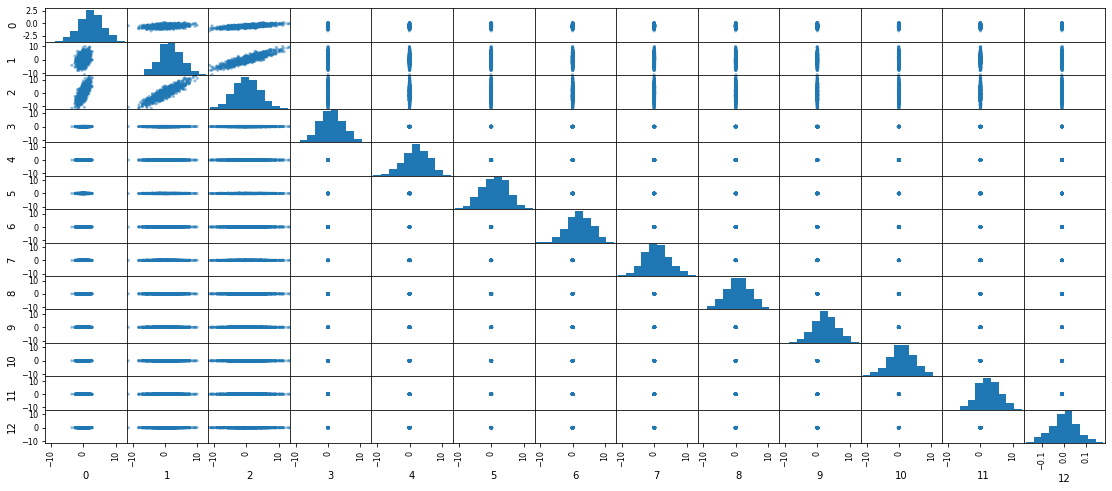

In [3]:
data_plus = np.vstack((data,rng.normal(loc=0,scale=3/50,size=(10,N))))
print("Now data has shape: ",data_plus.shape)

#PCA
c_plus = np.cov(data_plus)
l_plus, V_plus = la.eig(c_plus)
l_plus_r = np.real_if_close(l_plus)
V_plus_r = np.real_if_close(V_plus)

with np.printoptions(precision=4, suppress=True):
    print(c_plus)
    # for the 10 features we added we should see diagonal elements higher than off-diagonal elements because there is no correlation between them.
    print("\n\n -------- \n\n")
    print("Variance contribution")
    print(l_plus_r/c_plus.trace())

# PLOTTING SCATTER MATRIX TO SEE HIGH CORRELATIONS    
with plt.rc_context({'figure.figsize' : [19,8]}):
    plots=pd.plotting.scatter_matrix(pd.DataFrame(data_plus.T))
    mask=np.invert(np.eye(plots.shape[0],dtype=bool))
    # FIXING THE SCALE TO SEE COMPARISON
    for ax in plots[mask]:            
        ax.set_ylim(data_plus.min(),data_plus.max())
        ax.set_xlim(data_plus.min(),data_plus.max())
    plt.show()

# indeed we see that the lowest variance is due to the third component which can again be discarded to reduce dimensionality

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.



 --------- 
 
 CAMERA N# 1
Position of the camera (azimuthal and polar angles): (0.486206736030457,1.1614277422834371)
Contributions to variance along the three eigenvectors' direction:
[0.98 0.   0.02]

 --------- 
 
 CAMERA N# 2
Position of the camera (azimuthal and polar angles): (2.327488744245735,0.626415906763199)
Contributions to variance along the three eigenvectors' direction:
[0.98 0.02 0.  ]

 --------- 
 
 CAMERA N# 3
Position of the camera (azimuthal and polar angles): (0.13213031696676286,-0.3853581611234139)
Contributions to variance along the three eigenvectors' direction:
[0.98 0.   0.02]

 --------- 
 
 CAMERA N# 4
Position of the camera (azimuthal and polar angles): (0.16867229549651963,0.7159130210827745)
Contributions to variance along the three eigenvectors' direction:
[ 0.98 -0.    0.02]

 --------- 
 
 CAMERA N# 5
Position of the camera (azimuthal and polar angles): (2.915083458457991,0.5771284419807859)
Contributions to variance along the three eigenvectors' d

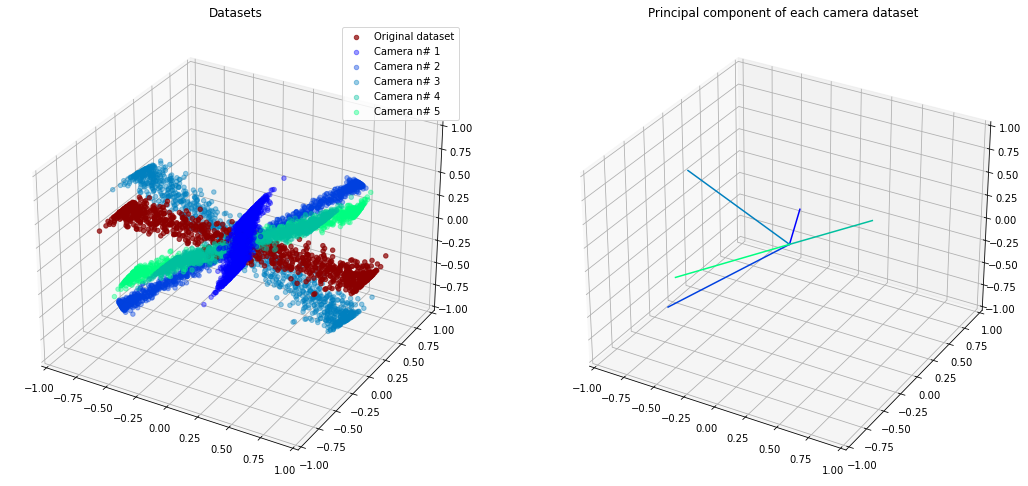

In [4]:
# 1: INITIALIZE DATA

t = np.linspace(0,20,1000)
data_spring = np.zeros((3,len(t)))
data_spring[0] = np.sin(2*t) # frequency of 2, amplitude of 1; setting the x values
data_spring[1] = rng.normal(loc=0,scale=0.1,size=len(t)) # y values drawn from a gaussian

# 2: PERFORM THE ROTATION

from scipy.spatial.transform import Rotation # we will use the Rotation class from scipy in order to change basis

# a camera that is placed at spherical coordinates theta and phi will see the object 
# like it's been rotated by -theta along the z axis
# and rotated by - phi along the y axis
def get_rotation_matrix(theta,phi,degrees=True):
    from scipy.spatial.transform import Rotation # we will use the Rotation class from scipy in order to change basis
    r1 = Rotation.from_euler('Z',-theta,degrees=degrees)
    r2 = Rotation.from_euler('Y',-phi,degrees=degrees)
    r = r2.as_matrix() @ r1.as_matrix()
    return r

# 3: PLOTTING ROTATED DATAPOINTS AND PERFORM PCA

with plt.rc_context({'figure.figsize' : [18,10]}):  # in order to get bigger figure for this plot

    fig = plt.figure()
    ax = fig.add_subplot(1,2,1,projection='3d')
    ax2 = fig.add_subplot(1,2,2,projection='3d')
    ax.scatter(data_spring[0,:],data_spring[1,:],data_spring[2,:],color='darkred',alpha=0.7,label='Original dataset')

    n_cameras = 5 # can be arbitrary
    colors = plt.cm.winter(np.linspace(0,1,n_cameras))

    for i in range(n_cameras):
        theta = rng.random()*2*np.pi
        phi = (rng.random()-0.5)*np.pi
        rot_mat = get_rotation_matrix(theta,phi,degrees=False)
        data_rotated = rot_mat @ data_spring
        ax.scatter(data_rotated[0,:],data_rotated[1,:],data_rotated[2,:],color=colors[i],alpha=0.4,label='Camera n# {}'.format(i+1))

        # PCA part
        c = np.cov(data_rotated)
        l,V = la.eig(c)
        l_real = np.real_if_close(l)

        trace = c.trace()
        print("\n --------- \n \n CAMERA N# {}".format(i+1))
        print("Position of the camera (azimuthal and polar angles): ({},{})".format(theta,phi))
        print("Contributions to variance along the three eigenvectors' direction:")
        with np.printoptions(precision=3, suppress=True):
            print(l_real/trace)

        # plotting the biggest eigenvector of the covariance matrix, corresponding to the "important" direction
        imax=np.argmax(l_real)
        eigvect=np.vstack((np.zeros(V.shape[0]),V[:,imax]))*l_real[imax]*2
        ax2.plot(eigvect[:,0],eigvect[:,1],eigvect[:,2],color=colors[i])

        # one could compute the "inverse" rotation by simply applying the eigenvectors' basis transformation
        # data_rotated_back = V.T @ data_rotated
        # not really the inverse rotation because it could be mapped to some other axis but that's what one would do with a dataset like this IRL.

    ax.set_title("Datasets")
    ax.legend()

    ax2.set_title("Principal component of each camera dataset")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_ylim(-1,1)
    ax2.set_zlim(-1,1)
    plt.show()



4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [ ]:
!cat ~/data/magic04.names   # get the names

Variance contributions
[0.44  0.258 0.135 0.089 0.041 0.029 0.008 0.    0.    0.   ]


array([[<AxesSubplot:xlabel='fLength', ylabel='fLength'>,
        <AxesSubplot:xlabel='fWidth', ylabel='fLength'>,
        <AxesSubplot:xlabel='fSize', ylabel='fLength'>,
        <AxesSubplot:xlabel='fConc', ylabel='fLength'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fLength'>,
        <AxesSubplot:xlabel='fAsym', ylabel='fLength'>,
        <AxesSubplot:xlabel='fM3Long', ylabel='fLength'>,
        <AxesSubplot:xlabel='fM3Trans', ylabel='fLength'>,
        <AxesSubplot:xlabel='fAlpha', ylabel='fLength'>,
        <AxesSubplot:xlabel='fDist', ylabel='fLength'>],
       [<AxesSubplot:xlabel='fLength', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fWidth', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fSize', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fConc', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fAsym', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fM3Long', ylabel='fWidth'>,
        <AxesSubplot:xlabel='fM3Trans'

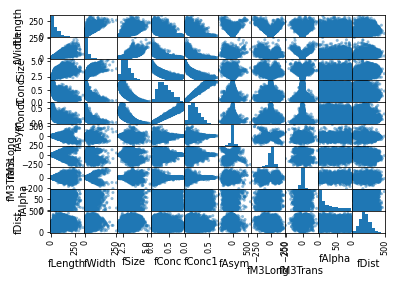

In [5]:
# from the magic04.names file we deduce the name of the data fields:
columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
#import data
df = pd.read_csv('~/data/magic04.data',names=columns)

#PDA
c=df.iloc[:,:-1].cov() # excluding "class" column
l,V = la.eig(c.values)
l_real = np.real_if_close(l)
with np.printoptions(precision=3, suppress=True):
    print("Variance contributions along eigenvectors of covariance matrix")
    print(l_real/c.values.trace())
    # printing this out shows us that data is actually constrained along some hyperplane 
    # and that dimensionality reduction is possible without loosing any important information

# plot the scatter matrix to try and see these correlations
pd.plotting.scatter_matrix(df.iloc[:,:-1])
